# Alameda Jury Selection

H0=Panel were selected at random from the available jurors

H1=Panel was not selected at random

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
jury = {"Ethnicity":["Asian","Black","Latino","White","Other"],"Eligible":[0.15,0.18,0.12,0.54,0.01],"Panels":[0.26,0.08,0.08,0.54,0.04]}
jury

{'Ethnicity': ['Asian', 'Black', 'Latino', 'White', 'Other'],
 'Eligible': [0.15, 0.18, 0.12, 0.54, 0.01],
 'Panels': [0.26, 0.08, 0.08, 0.54, 0.04]}

In [ ]:
df=pd.DataFrame(jury)
df1=df.set_index('Ethnicity')
df1

,Eligible,Panels
Ethnicity,,
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


Visualizing their Difference

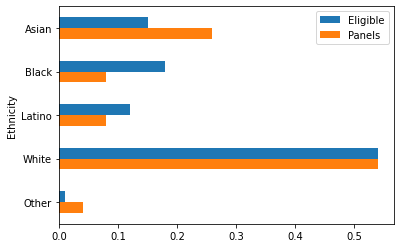

In [ ]:
df1.plot.barh()
plt.ylabel('Ethnicity')
plt.gca().invert_yaxis()

In [ ]:
#plotting Their Differences

In [ ]:
df1['jury_with_diffs'] =df1['Panels']-df1['Eligible']
df1

,Eligible,Panels,jury_with_diffs
Ethnicity,,,
Asian,0.15,0.26,0.11
Black,0.18,0.08,-0.10
Latino,0.12,0.08,-0.04
White,0.54,0.54,0.00
Other,0.01,0.04,0.03


In [ ]:
df1['Abs_diffs'] =abs(df1['jury_with_diffs'])
df1

,Eligible,Panels,jury_with_diffs,abs_diffs,Abs_diffs
Ethnicity,,,,,
Asian,0.15,0.26,0.11,0.055,0.11
Black,0.18,0.08,-0.10,0.050,0.10
Latino,0.12,0.08,-0.04,0.020,0.04
White,0.54,0.54,0.00,0.000,0.00
Other,0.01,0.04,0.03,0.015,0.03


In [ ]:
test_statistic = df1['Abs_diffs'].sum()/2
test_statistic

0.14

In [ ]:
import numpy as np
def total_variation_distance(distribution_1, distribution_2):
    return np.abs(distribution_1 - distribution_2).sum()/2

In [ ]:
def table_tvd(table, label, other):
    return total_variation_distance(table[label], table[other])

observed_stat =table_tvd(df1, 'Eligible', 'Panels')
print(observed_stat)

0.14


In [ ]:
#let the population size =1453
import numpy.random as npr
panel_size = 1453
np.random.multinomial(1453,[0.15,0.18,0.12,0.54,0.01])

array([220, 262, 167, 790,  14])

In [ ]:
df2 = pd.DataFrame(df1,columns = ['Eligible','Panels'])

In [ ]:
df2['Random Sample'] = np.random.multinomial(1453,[0.15,0.18,0.12,0.54,0.01])/1453
df2

,Eligible,Panels,Random Sample
Ethnicity,,,
Asian,0.15,0.26,0.139711
Black,0.18,0.08,0.180317
Latino,0.12,0.08,0.110117
White,0.54,0.54,0.560220
Other,0.01,0.04,0.009635


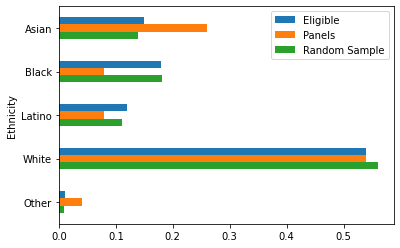

In [ ]:
df2.plot.barh()
plt.ylabel('Ethnicity')
plt.gca().invert_yaxis()

In [ ]:
TVD = (abs(df2['Eligible']-df2['Random Sample'])).sum()/2
TVD

0.02053682037164485

In [ ]:
simulations = 5000
tvd_list=[]
for i in np.arange(simulations):
    df2["Random Sample"]=(npr.multinomial(1453,[0.15, 0.18, 0.12, 0.54, 0.01]))/panel_size
    tvd_list.append(table_tvd(df2, 'Eligible', 'Random Sample'))
    
tvd_list

[0.004115622849277349,
 0.021321403991741223,
 0.023613214039917382,
 0.017219545767377806,
 0.01900894700619413,
 0.008189951823812762,
 0.013661390227116273,
 0.01891259463179624,
 0.030860289057123177,
 0.006304198210598754,
 0.016448726772195416,
 0.02557467309015831,
 0.00414315209910526,
 0.008685478320715756,
 0.00928423950447349,
 0.02300757054370265,
 0.02134893324156913,
 0.01784583620096352,
 0.00699242945629734,
 0.013468685478320709,
 0.010660701995870568,
 0.014528561596696512,
 0.048568479008947014,
 0.022037164487267717,
 0.00896077081899514,
 0.03499655884377148,
 0.027233310392291855,
 0.015402615278733656,
 0.011369580178940148,
 0.010247763248451475,
 0.013427391603578798,
 0.005113558155540244,
 0.021548520302821735,
 0.015437026841018529,
 0.015437026841018577,
 0.02260151410874054,
 0.02556779077770132,
 0.02790089470061939,
 0.016180316586373047,
 0.012037164487267715,
 0.02061252580867169,
 0.029119064005505832,
 0.006916724019270493,
 0.016256022023399895,
 0.

In [ ]:
tvd_final_df=pd.DataFrame(tvd_list)
tvd_final_df.rename(columns={0:"TVD"},inplace=True) # renaming column
tvd_final_df.head()

,TVD
0,0.004116
1,0.021321
2,0.023613
3,0.017220
4,0.019009


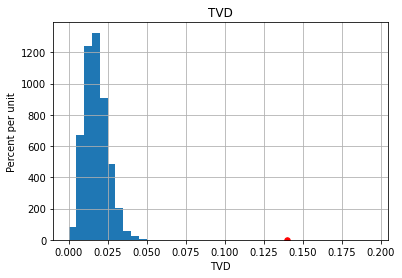

In [ ]:
tvd_final_df.hist(bins=np.arange(0,0.2,0.005))

plt.ylabel('Percent per unit')
plt.xlabel('TVD')
plt.scatter(observed_stat, 0, color='red', s=30)


distance between the panels and the population was 0.14,so it is farawaay from the distribution. panels were not representative of the distribution provided for the eligible jurors.
 
**Hence  Null hypothesis is rejected**